#Task 1

In [2]:
from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

import tensorflow 
import keras  
import os
import glob 
from skimage.color import gray2rgb
from skimage import io
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
import glob
from skimage.io import imread
from skimage.color import gray2rgb
import pandas as pd, numpy as np


def convert_to_csv(path_to_dataset):
    image_paths = glob.glob(path_to_dataset + '/*/*/*.JPEG')
    
    train_imgs = []
    test_imgs = []

    for image_path in image_paths:
        image = imread(image_path)
        if image.shape[-1] != 3:
            image = gray2rgb(image)
        if image_path.split('/')[-3] == 'train':
            train_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])
        else:
            test_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])
    
    img_0 = imread(image_paths[0])
    column_names = [f"p_{x}" for x in range(np.prod(img_0.shape))] + ['label']
    
    train_df = pd.DataFrame(train_imgs, columns=column_names)
    test_df = pd.DataFrame(test_imgs, columns=column_names)

    train_df.to_csv(path_to_dataset+'/train.csv', index=False)
    test_df.to_csv(path_to_dataset+'/test.csv', index=False)

convert_to_csv('/content/drive/MyDrive/CSE428/Group_5')

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/CSE428/Group_5/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/CSE428/Group_5/test.csv')

print(train_data.shape)
print(test_data.shape)

(2150, 12289)
(250, 12289)


In [ ]:
print(train_data.keys())
print(test_data.keys())

Index(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9',
       ...
       'p_12279', 'p_12280', 'p_12281', 'p_12282', 'p_12283', 'p_12284',
       'p_12285', 'p_12286', 'p_12287', 'label'],
      dtype='object', length=12289)
Index(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9',
       ...
       'p_12279', 'p_12280', 'p_12281', 'p_12282', 'p_12283', 'p_12284',
       'p_12285', 'p_12286', 'p_12287', 'label'],
      dtype='object', length=12289)


In [ ]:
print(train_data['label'])
print(test_data['label'])

0       snail
1       snail
2       snail
3       snail
4       snail
        ...  
2145    fence
2146    fence
2147    fence
2148    fence
2149    fence
Name: label, Length: 2150, dtype: object
0            fence
1            fence
2            fence
3            fence
4            fence
          ...     
245    pill-bottle
246    pill-bottle
247    pill-bottle
248    pill-bottle
249    pill-bottle
Name: label, Length: 250, dtype: object


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train_data['label'])
train_data['label'] = le.transform(train_data['label'])
le.fit(test_data['label'])
test_data['label'] = le.transform(test_data['label'])

In [ ]:
print(train_data['label'])
print(test_data['label'])

0       4
1       4
2       4
3       4
4       4
       ..
2145    0
2146    0
2147    0
2148    0
2149    0
Name: label, Length: 2150, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: label, Length: 250, dtype: int64


In [ ]:
train_data.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,155,187,140,124,153,109,76,103,62,83,...,149,156,102,134,140,78,166,172,108,4
1,47,58,26,55,66,36,40,49,20,65,...,171,166,162,158,153,150,183,178,175,4
2,0,9,4,0,10,0,0,10,0,0,...,206,188,178,200,180,169,208,186,175,4
3,84,32,11,107,56,35,100,53,33,133,...,43,18,14,80,56,54,56,32,32,4
4,4,3,0,5,4,0,7,6,2,9,...,165,167,166,164,166,165,167,169,168,4


In [ ]:
x_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']

In [ ]:
x_train

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,155,187,140,124,153,109,76,103,62,83,...,144,149,156,102,134,140,78,166,172,108
1,47,58,26,55,66,36,40,49,20,65,...,151,171,166,162,158,153,150,183,178,175
2,0,9,4,0,10,0,0,10,0,0,...,187,206,188,178,200,180,169,208,186,175
3,84,32,11,107,56,35,100,53,33,133,...,27,43,18,14,80,56,54,56,32,32
4,4,3,0,5,4,0,7,6,2,9,...,168,165,167,166,164,166,165,167,169,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,146,170,134,121,145,111,111,135,101,109,...,114,59,74,105,59,74,105,65,80,111
2146,92,92,54,82,82,44,80,80,42,85,...,24,29,45,18,19,35,9,30,48,24
2147,223,236,245,207,220,229,223,233,242,203,...,25,50,60,52,66,75,70,94,100,96
2148,102,72,18,78,48,0,88,58,6,99,...,127,109,124,129,145,160,165,147,160,168


In [ ]:
y_train

0       4
1       4
2       4
3       4
4       4
       ..
2145    0
2146    0
2147    0
2148    0
2149    0
Name: label, Length: 2150, dtype: int64

In [ ]:
x_norm_train = preprocessing.minmax_scale(x_train)
x_norm_train = pd.DataFrame(x_norm_train)
x_norm_train

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0.607843,0.733333,0.549020,0.486275,0.600000,0.427451,0.298039,0.403922,0.243137,0.325490,...,0.564706,0.584314,0.611765,0.400000,0.525490,0.549020,0.305882,0.650980,0.674510,0.423529
1,0.184314,0.227451,0.101961,0.215686,0.258824,0.141176,0.156863,0.192157,0.078431,0.254902,...,0.592157,0.670588,0.650980,0.635294,0.619608,0.600000,0.588235,0.717647,0.698039,0.686275
2,0.000000,0.035294,0.015686,0.000000,0.039216,0.000000,0.000000,0.039216,0.000000,0.000000,...,0.733333,0.807843,0.737255,0.698039,0.784314,0.705882,0.662745,0.815686,0.729412,0.686275
3,0.329412,0.125490,0.043137,0.419608,0.219608,0.137255,0.392157,0.207843,0.129412,0.521569,...,0.105882,0.168627,0.070588,0.054902,0.313725,0.219608,0.211765,0.219608,0.125490,0.125490
4,0.015686,0.011765,0.000000,0.019608,0.015686,0.000000,0.027451,0.023529,0.007843,0.035294,...,0.658824,0.647059,0.654902,0.650980,0.643137,0.650980,0.647059,0.654902,0.662745,0.658824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,0.572549,0.666667,0.525490,0.474510,0.568627,0.435294,0.435294,0.529412,0.396078,0.427451,...,0.447059,0.231373,0.290196,0.411765,0.231373,0.290196,0.411765,0.254902,0.313725,0.435294
2146,0.360784,0.360784,0.211765,0.321569,0.321569,0.172549,0.313725,0.313725,0.164706,0.333333,...,0.094118,0.113725,0.176471,0.070588,0.074510,0.137255,0.035294,0.117647,0.188235,0.094118
2147,0.874510,0.925490,0.960784,0.811765,0.862745,0.898039,0.874510,0.913725,0.949020,0.796078,...,0.098039,0.196078,0.235294,0.203922,0.258824,0.294118,0.274510,0.368627,0.392157,0.376471
2148,0.400000,0.282353,0.070588,0.305882,0.188235,0.000000,0.345098,0.227451,0.023529,0.388235,...,0.498039,0.427451,0.486275,0.505882,0.568627,0.627451,0.647059,0.576471,0.627451,0.658824


In [ ]:
x_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']

In [ ]:
x_test

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12278,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287
0,89,80,15,93,84,19,132,123,58,117,...,213,240,225,228,220,205,208,121,106,109
1,86,57,15,136,107,65,159,131,92,188,...,212,187,219,232,64,97,112,178,211,226
2,54,0,50,213,125,199,247,138,221,255,...,252,233,223,234,245,235,244,37,27,36
3,127,127,127,128,128,128,141,141,141,146,...,24,61,61,61,19,19,19,20,20,20
4,92,90,77,112,110,97,100,97,80,133,...,145,99,117,131,105,123,137,51,67,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,104,106,93,110,110,98,107,107,97,174,...,63,106,79,68,107,80,69,95,71,59
246,0,0,0,0,0,0,0,0,0,0,...,175,111,136,166,123,144,175,120,141,172
247,66,138,75,66,138,75,66,138,75,67,...,46,12,120,45,12,120,45,12,120,45
248,99,113,116,104,115,117,89,99,98,64,...,66,59,60,55,61,62,57,70,71,66


In [ ]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: label, Length: 250, dtype: int64

In [ ]:
x_norm_test = preprocessing.minmax_scale(x_test)
x_norm_test = pd.DataFrame(x_norm_test)
x_norm_test

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0.349020,0.313725,0.058824,0.364706,0.329412,0.074510,0.517647,0.482353,0.227451,0.458824,...,0.835294,0.941176,0.882353,0.894118,0.862745,0.803922,0.815686,0.474510,0.415686,0.427451
1,0.337255,0.223529,0.058824,0.533333,0.419608,0.254902,0.623529,0.513725,0.360784,0.737255,...,0.831373,0.733333,0.858824,0.909804,0.250980,0.380392,0.439216,0.698039,0.827451,0.886275
2,0.211765,0.000000,0.196078,0.835294,0.490196,0.780392,0.968627,0.541176,0.866667,1.000000,...,0.988235,0.913725,0.874510,0.917647,0.960784,0.921569,0.956863,0.145098,0.105882,0.141176
3,0.498039,0.498039,0.498039,0.501961,0.501961,0.501961,0.552941,0.552941,0.552941,0.572549,...,0.094118,0.239216,0.239216,0.239216,0.074510,0.074510,0.074510,0.078431,0.078431,0.078431
4,0.360784,0.352941,0.301961,0.439216,0.431373,0.380392,0.392157,0.380392,0.313725,0.521569,...,0.568627,0.388235,0.458824,0.513725,0.411765,0.482353,0.537255,0.200000,0.262745,0.313725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.407843,0.415686,0.364706,0.431373,0.431373,0.384314,0.419608,0.419608,0.380392,0.682353,...,0.247059,0.415686,0.309804,0.266667,0.419608,0.313725,0.270588,0.372549,0.278431,0.231373
246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.435294,0.533333,0.650980,0.482353,0.564706,0.686275,0.470588,0.552941,0.674510
247,0.258824,0.541176,0.294118,0.258824,0.541176,0.294118,0.258824,0.541176,0.294118,0.262745,...,0.180392,0.047059,0.470588,0.176471,0.047059,0.470588,0.176471,0.047059,0.470588,0.176471
248,0.388235,0.443137,0.454902,0.407843,0.450980,0.458824,0.349020,0.388235,0.384314,0.250980,...,0.258824,0.231373,0.235294,0.215686,0.239216,0.243137,0.223529,0.274510,0.278431,0.258824


In [ ]:
model = linear_model.LogisticRegression(C=100, fit_intercept=True, solver='lbfgs', max_iter=100)
model = model.fit(x_norm_train, y_train)
y_predict = model.predict(x_norm_test)

acc_training = np.mean(y_train == model.predict(x_norm_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy (%) = 87.90697674418605
Testing accuracy (%) = 31.2


In [ ]:
cnf_matrix=confusion_matrix(y_test,y_predict)
print(cnf_matrix)

[[11  8 12  7 12]
 [ 6 23  6  4 11]
 [16  5 21  5  3]
 [ 9 15 12  5  9]
 [ 8 14  6  4 18]]


In [ ]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# F1 Score
F1 = 2*((PPV)*(TPR)/(PPV + TPR))  

In [ ]:
first = []
second = []
third = []
fourth = []
fifth = []
t=[]

t_ML2=[]
t_ML2_v2=[]


def formTable(a):
  
  for i in range(len(a)):
    if i == 0:
      first.append(round(a[i],2))
    if i == 1:
      second.append(round(a[i],2))
    if i == 2:
      third.append(round(a[i],2))
    if i == 3:
      fourth.append(round(a[i],2))
    if i == 4:
      fifth.append(round(a[i],2))

formTable(TPR)
formTable(TNR)
formTable(PPV)
formTable(NPV)
formTable(F1)

t.append(first)
t.append(second)
t.append(third)
t.append(fourth)
t.append(fifth)
# print(t)

In [ ]:
slst=[]
slst_ML2=[]
slst_ML2_t6 =[]
def formt(t):
  s0=0
  s1=0
  s2=0
  s3=0
  s4=0
  

  for i in range(len(t)+1):
    for j in range(len(t)):
      if i!=0:
        break
      else:
        s0+= t[j][i]
      avg_s0 = s0/len(t)
    for j in range(len(t)):
      if i!=1:
        break
      else:
        s1+= t[j][i]
      avg_s1 = s1/len(t)
    for j in range(len(t)):
      if i!=2:
        break
      else:
        s2+= t[j][i]
      avg_s2 = s2/len(t)
    for j in range(len(t)):
      if i!=3:
        break
      else:
        s3+= t[j][i]
      avg_s3 = s3/len(t)
    for j in range(len(t)):
      if i!=4:
        break
      else:
        s4+= t[j][i]
      avg_s4 = s4/len(t)
  
  slst.append(round(avg_s0,2))
  slst.append(round(avg_s1,2))
  slst.append(round(avg_s2,2))
  slst.append(round(avg_s3,2))
  slst.append(round(avg_s4,2))
  # print(slst)
  t.append(slst)
  return t
formt(t)

[[0.22, 0.8, 0.22, 0.8, 0.22],
 [0.46, 0.79, 0.35, 0.85, 0.4],
 [0.42, 0.82, 0.37, 0.85, 0.39],
 [0.1, 0.9, 0.2, 0.8, 0.13],
 [0.36, 0.82, 0.34, 0.84, 0.35],
 [0.31, 0.83, 0.3, 0.83, 0.3]]

In [ ]:
df = pd.DataFrame(t, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4','avg'])
print(df)

     Sensitivity  Specificity   PPV   NPV  F1 Score
0           0.22         0.80  0.22  0.80      0.22
1           0.46         0.79  0.35  0.85      0.40
2           0.42         0.82  0.37  0.85      0.39
3           0.10         0.90  0.20  0.80      0.13
4           0.36         0.82  0.34  0.84      0.35
avg         0.31         0.83  0.30  0.83      0.30


# Task 2

In [ ]:
x_norm_train.shape

(2150, 12288)

In [ ]:
x_norm_train = np.array(x_norm_train)
x_norm_test = np.array(x_norm_test)

In [ ]:
x_norm_train = x_norm_train.reshape(x_norm_train.shape[0], -1)
x_norm_test = x_norm_test.reshape(x_norm_test.shape[0], -1)

number_of_classes = 5
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

In [ ]:
model = Sequential()
model.add( Input(shape = (12288,)) )
model.add( Dense(200, activation='sigmoid') ) #hidden layer
model.add( Dense(40, activation='sigmoid') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

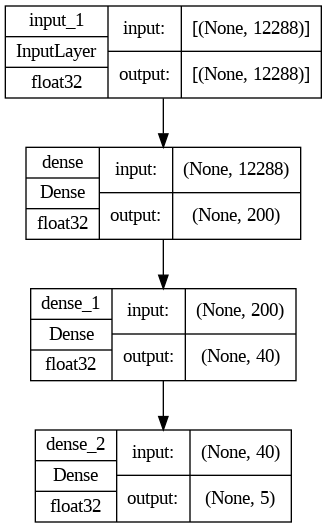

In [ ]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [ ]:
model.fit(x_norm_train, y_train, epochs=100, verbose=1)

Epoch 1/100
68/68 [==============================] - 4s 34ms/step - loss: 1.5770 - accuracy: 0.2777
Epoch 2/100
68/68 [==============================] - 2s 35ms/step - loss: 1.5420 - accuracy: 0.3265
Epoch 3/100
68/68 [==============================] - 2s 35ms/step - loss: 1.5188 - accuracy: 0.3470
Epoch 4/100
68/68 [==============================] - 2s 34ms/step - loss: 1.5086 - accuracy: 0.3642
Epoch 5/100
68/68 [==============================] - 3s 48ms/step - loss: 1.5046 - accuracy: 0.3605
Epoch 6/100
68/68 [==============================] - 3s 44ms/step - loss: 1.4963 - accuracy: 0.3628
Epoch 7/100
68/68 [==============================] - 2s 33ms/step - loss: 1.4742 - accuracy: 0.3633
Epoch 8/100
68/68 [==============================] - 2s 34ms/step - loss: 1.4591 - accuracy: 0.3777
Epoch 9/100
68/68 [==============================] - 2s 35ms/step - loss: 1.4652 - accuracy: 0.3558
Epoch 10/100
68/68 [==============================] - 2s 35ms/step - loss: 1.4627 - accuracy: 0.3656

In [ ]:
y_pred = model.predict(x_norm_test)

8/8 [==============================] - 0s 11ms/step


In [ ]:
y_predicted = np.argmax(y_pred, axis=1)

In [ ]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
acc_testing = np.mean(y_actual == y_predicted)*100
print("Testing accuracy (%) =", acc_testing)

Testing accuracy (%) = 32.800000000000004


In [ ]:
test_loss, test_acc = model.evaluate(x_norm_test, y_test)
print("Testing accuracy (%) =", test_acc)

8/8 [==============================] - 0s 7ms/step - loss: 1.7357 - accuracy: 0.3280
Testing accuracy (%) = 0.328000009059906


In [ ]:
cnf_matrix2=confusion_matrix(y_actual,y_predicted)
print(cnf_matrix2)

[[20  3  9  0 18]
 [11 25  2  0 12]
 [23  6 16  0  5]
 [13 15  9  0 13]
 [15 14  0  0 21]]


In [ ]:
FP = cnf_matrix2.sum(axis=0) - np.diag(cnf_matrix2) 
FN = cnf_matrix2.sum(axis=1) - np.diag(cnf_matrix2)
TP = np.diag(cnf_matrix2)
TN = cnf_matrix2.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# F1 Score
F1 = 2*((PPV)*(TPR)/(PPV + TPR))  

<ipython-input-28-34669f60c045>:17: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)


In [ ]:
first = []
second = []
third = []
fourth = []
fifth = []
t=[]

t_ML2=[]
t_ML2_v2=[]


def formTable(a):
  
  for i in range(len(a)):
    if i == 0:
      first.append(round(a[i],2))
    if i == 1:
      second.append(round(a[i],2))
    if i == 2:
      third.append(round(a[i],2))
    if i == 3:
      fourth.append(round(a[i],2))
    if i == 4:
      fifth.append(round(a[i],2))

formTable(TPR)
formTable(TNR)
formTable(PPV)
formTable(NPV)
formTable(F1)

t.append(first)
t.append(second)
t.append(third)
t.append(fourth)
t.append(fifth)
# print(t)

In [ ]:
slst=[]
slst_ML2=[]
slst_ML2_t6 =[]
def formt(t):
  s0=0
  s1=0
  s2=0
  s3=0
  s4=0
  

  for i in range(len(t)+1):
    for j in range(len(t)):
      if i!=0:
        break
      else:
        s0+= t[j][i]
      avg_s0 = s0/len(t)
    for j in range(len(t)):
      if i!=1:
        break
      else:
        s1+= t[j][i]
      avg_s1 = s1/len(t)
    for j in range(len(t)):
      if i!=2:
        break
      else:
        s2+= t[j][i]
      avg_s2 = s2/len(t)
    for j in range(len(t)):
      if i!=3:
        break
      else:
        s3+= t[j][i]
      avg_s3 = s3/len(t)
    for j in range(len(t)):
      if i!=4:
        break
      else:
        s4+= t[j][i]
      avg_s4 = s4/len(t)
  
  slst.append(round(avg_s0,2))
  slst.append(round(avg_s1,2))
  slst.append(round(avg_s2,2))
  slst.append(round(avg_s3,2))
  slst.append(round(avg_s4,2))
  # print(slst)
  t.append(slst)
  return t
formt(t)

[[0.4, 0.69, 0.24, 0.82, 0.3],
 [0.5, 0.81, 0.4, 0.87, 0.44],
 [0.32, 0.9, 0.44, 0.84, 0.37],
 [0.0, 1.0, nan, 0.8, nan],
 [0.42, 0.76, 0.3, 0.84, 0.35],
 [0.33, 0.83, nan, 0.83, nan]]

In [ ]:
df = pd.DataFrame(t, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4','avg'])
print(df)

     Sensitivity  Specificity   PPV   NPV  F1 Score
0           0.40         0.69  0.24  0.82      0.30
1           0.50         0.81  0.40  0.87      0.44
2           0.32         0.90  0.44  0.84      0.37
3           0.00         1.00   NaN  0.80       NaN
4           0.42         0.76  0.30  0.84      0.35
avg         0.33         0.83   NaN  0.83       NaN


# Task 3

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/CSE428/Group_5/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/CSE428/Group_5/test.csv')

print(train_data.shape)
print(test_data.shape)

(2150, 12289)
(250, 12289)


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train_data['label'])
train_data['label'] = le.transform(train_data['label'])
le.fit(test_data['label'])
test_data['label'] = le.transform(test_data['label'])

In [ ]:
count_class_0, count_class_1,count_class_2,count_class_3,count_class_4 = train_data.label.value_counts()
print(train_data.label.value_counts())

1    500
2    500
0    500
4    400
3    250
Name: label, dtype: int64


In [ ]:
df_class_0 = train_data[train_data['label'] == 2]
df_class_1 = train_data[train_data['label'] == 0]
df_class_2 = train_data[train_data['label'] == 1]
df_class_3 = train_data[train_data['label'] == 3]
df_class_4 = train_data[train_data['label'] == 4]

Random over-sampling:
2    500
0    500
1    500
3    500
4    500
Name: label, dtype: int64


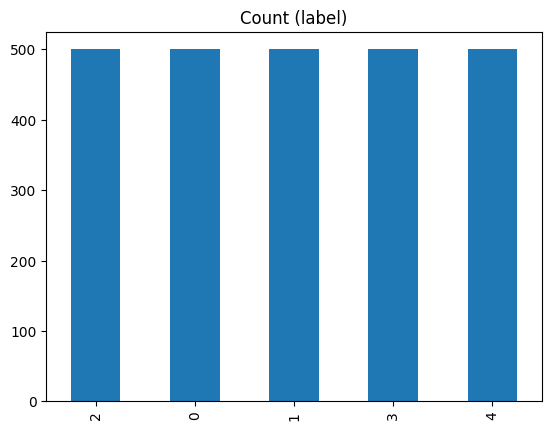

In [ ]:
df_class_3_over = df_class_3.sample(count_class_1, replace=True)
df_class_4_over = df_class_4.sample(count_class_1, replace=True)
train_data= pd.concat([df_class_0,df_class_1,df_class_2,df_class_3_over, df_class_4_over], axis=0)

print('Random over-sampling:')
print(train_data.label.value_counts())

train_data.label.value_counts().plot(kind='bar', title='Count (label)');

In [ ]:
train_data

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
1150,255,254,251,255,253,252,254,253,251,254,...,144,144,146,151,149,152,192,188,189,2
1151,92,113,140,92,113,140,90,114,140,90,...,83,117,154,82,116,153,82,116,153,2
1152,128,144,160,128,144,160,128,144,160,128,...,243,203,144,241,201,142,240,198,138,2
1153,82,98,121,85,100,123,90,102,126,94,...,173,141,120,174,142,121,175,142,123,2
1154,31,184,216,62,205,235,78,203,231,134,...,151,82,85,164,100,101,153,91,94,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,25,64,11,20,58,7,11,47,0,13,...,124,107,25,99,76,0,103,75,2,4
315,0,0,9,0,0,9,0,0,9,0,...,0,0,4,6,7,11,0,0,4,4
191,176,162,99,178,167,103,92,81,15,124,...,11,7,0,9,9,1,39,40,35,4
227,3,2,0,5,5,0,28,27,7,53,...,59,51,30,42,34,15,11,2,0,4


In [ ]:
x_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']

print("shape of X =", x_train.shape)
print("shape of y =", y_train.shape)

shape of X = (2500, 12288)
shape of y = (2500,)


In [ ]:
x_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']

print("shape of X =", x_test.shape)
print("shape of y =", y_test.shape)

shape of X = (250, 12288)
shape of y = (250,)


In [ ]:
x_norm_train = preprocessing.minmax_scale(x_train)
x_norm_train = pd.DataFrame(x_norm_train)
x_norm_train

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,1.000000,0.996078,0.984314,1.000000,0.992157,0.988235,0.996078,0.992157,0.984314,0.996078,...,0.623529,0.564706,0.564706,0.572549,0.592157,0.584314,0.596078,0.752941,0.737255,0.741176
1,0.360784,0.443137,0.549020,0.360784,0.443137,0.549020,0.352941,0.447059,0.549020,0.352941,...,0.607843,0.325490,0.458824,0.603922,0.321569,0.454902,0.600000,0.321569,0.454902,0.600000
2,0.501961,0.564706,0.627451,0.501961,0.564706,0.627451,0.501961,0.564706,0.627451,0.501961,...,0.576471,0.952941,0.796078,0.564706,0.945098,0.788235,0.556863,0.941176,0.776471,0.541176
3,0.321569,0.384314,0.474510,0.333333,0.392157,0.482353,0.352941,0.400000,0.494118,0.368627,...,0.470588,0.678431,0.552941,0.470588,0.682353,0.556863,0.474510,0.686275,0.556863,0.482353
4,0.121569,0.721569,0.847059,0.243137,0.803922,0.921569,0.305882,0.796078,0.905882,0.525490,...,0.231373,0.592157,0.321569,0.333333,0.643137,0.392157,0.396078,0.600000,0.356863,0.368627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.098039,0.250980,0.043137,0.078431,0.227451,0.027451,0.043137,0.184314,0.000000,0.050980,...,0.176471,0.486275,0.419608,0.098039,0.388235,0.298039,0.000000,0.403922,0.294118,0.007843
2496,0.000000,0.000000,0.035294,0.000000,0.000000,0.035294,0.000000,0.000000,0.035294,0.000000,...,0.015686,0.000000,0.000000,0.015686,0.023529,0.027451,0.043137,0.000000,0.000000,0.015686
2497,0.690196,0.635294,0.388235,0.698039,0.654902,0.403922,0.360784,0.317647,0.058824,0.486275,...,0.003922,0.043137,0.027451,0.000000,0.035294,0.035294,0.003922,0.152941,0.156863,0.137255
2498,0.011765,0.007843,0.000000,0.019608,0.019608,0.000000,0.109804,0.105882,0.027451,0.207843,...,0.035294,0.231373,0.200000,0.117647,0.164706,0.133333,0.058824,0.043137,0.007843,0.000000


In [ ]:
x_norm_test = preprocessing.minmax_scale(x_test)
x_norm_test = pd.DataFrame(x_norm_test)
x_norm_test

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0.349020,0.313725,0.058824,0.364706,0.329412,0.074510,0.517647,0.482353,0.227451,0.458824,...,0.835294,0.941176,0.882353,0.894118,0.862745,0.803922,0.815686,0.474510,0.415686,0.427451
1,0.337255,0.223529,0.058824,0.533333,0.419608,0.254902,0.623529,0.513725,0.360784,0.737255,...,0.831373,0.733333,0.858824,0.909804,0.250980,0.380392,0.439216,0.698039,0.827451,0.886275
2,0.211765,0.000000,0.196078,0.835294,0.490196,0.780392,0.968627,0.541176,0.866667,1.000000,...,0.988235,0.913725,0.874510,0.917647,0.960784,0.921569,0.956863,0.145098,0.105882,0.141176
3,0.498039,0.498039,0.498039,0.501961,0.501961,0.501961,0.552941,0.552941,0.552941,0.572549,...,0.094118,0.239216,0.239216,0.239216,0.074510,0.074510,0.074510,0.078431,0.078431,0.078431
4,0.360784,0.352941,0.301961,0.439216,0.431373,0.380392,0.392157,0.380392,0.313725,0.521569,...,0.568627,0.388235,0.458824,0.513725,0.411765,0.482353,0.537255,0.200000,0.262745,0.313725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.407843,0.415686,0.364706,0.431373,0.431373,0.384314,0.419608,0.419608,0.380392,0.682353,...,0.247059,0.415686,0.309804,0.266667,0.419608,0.313725,0.270588,0.372549,0.278431,0.231373
246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.435294,0.533333,0.650980,0.482353,0.564706,0.686275,0.470588,0.552941,0.674510
247,0.258824,0.541176,0.294118,0.258824,0.541176,0.294118,0.258824,0.541176,0.294118,0.262745,...,0.180392,0.047059,0.470588,0.176471,0.047059,0.470588,0.176471,0.047059,0.470588,0.176471
248,0.388235,0.443137,0.454902,0.407843,0.450980,0.458824,0.349020,0.388235,0.384314,0.250980,...,0.258824,0.231373,0.235294,0.215686,0.239216,0.243137,0.223529,0.274510,0.278431,0.258824


In [ ]:
x_norm_train = np.array(x_norm_train)
x_norm_test = np.array(x_norm_test)

In [ ]:
x_norm_train = x_norm_train.reshape(x_norm_train.shape[0], -1)
x_norm_test = x_norm_test.reshape(x_norm_test.shape[0], -1)

number_of_classes = 5
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

In [ ]:
model = Sequential()
model.add( Input(shape = (12288,)) )
model.add( Dense(200, activation='sigmoid') ) #hidden layer
model.add( Dense(40, activation='sigmoid') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

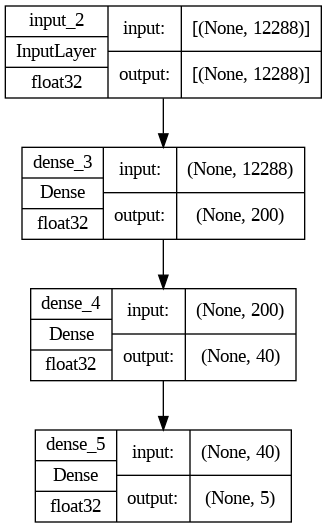

In [ ]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [ ]:
model.fit(x_norm_train, y_train, epochs=100, verbose=1)

Epoch 1/100
79/79 [==============================] - 3s 39ms/step - loss: 0.9879 - accuracy: 0.5588
Epoch 2/100
79/79 [==============================] - 3s 33ms/step - loss: 0.9692 - accuracy: 0.6160
Epoch 3/100
79/79 [==============================] - 3s 33ms/step - loss: 0.8549 - accuracy: 0.6356
Epoch 4/100
79/79 [==============================] - 3s 33ms/step - loss: 0.8274 - accuracy: 0.6672
Epoch 5/100
79/79 [==============================] - 3s 44ms/step - loss: 0.8585 - accuracy: 0.6288
Epoch 6/100
79/79 [==============================] - 3s 38ms/step - loss: 0.8395 - accuracy: 0.6516
Epoch 7/100
79/79 [==============================] - 3s 32ms/step - loss: 0.8505 - accuracy: 0.6536
Epoch 8/100
79/79 [==============================] - 3s 32ms/step - loss: 0.8087 - accuracy: 0.6768
Epoch 9/100
79/79 [==============================] - 3s 32ms/step - loss: 0.8123 - accuracy: 0.6704
Epoch 10/100
79/79 [==============================] - 3s 42ms/step - loss: 0.8109 - accuracy: 0.6748

In [ ]:
y_pred = model.predict(x_norm_test)

8/8 [==============================] - 0s 6ms/step


In [ ]:
y_predicted = np.argmax(y_pred, axis=1)

In [ ]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
acc_testing = np.mean(y_actual == y_predicted)*100
print("Testing accuracy (%) =", acc_testing)

Testing accuracy (%) = 32.4


In [ ]:
test_loss, test_acc = model.evaluate(x_norm_test, y_test)
print("Testing accuracy (%) =", test_acc)

8/8 [==============================] - 1s 24ms/step - loss: 2.9665 - accuracy: 0.3240
Testing accuracy (%) = 0.3240000009536743


In [ ]:
cnf_matrix3=confusion_matrix(y_actual,y_predicted)
print(cnf_matrix3)

[[18  3 13  2 14]
 [12 16  4  3 15]
 [10  4 25  2  9]
 [13 11 15  0 11]
 [16  6  3  3 22]]


In [ ]:
FP = cnf_matrix3.sum(axis=0) - np.diag(cnf_matrix3) 
FN = cnf_matrix3.sum(axis=1) - np.diag(cnf_matrix3)
TP = np.diag(cnf_matrix3)
TN = cnf_matrix3.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# F1 Score
F1 = 2*((PPV)*(TPR)/(PPV + TPR))  

<ipython-input-78-b15d85fceb0e>:23: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2*((PPV)*(TPR)/(PPV + TPR))


In [ ]:
first = []
second = []
third = []
fourth = []
fifth = []
t=[]

t_ML2=[]
t_ML2_v2=[]


def formTable(a):
  
  for i in range(len(a)):
    if i == 0:
      first.append(round(a[i],2))
    if i == 1:
      second.append(round(a[i],2))
    if i == 2:
      third.append(round(a[i],2))
    if i == 3:
      fourth.append(round(a[i],2))
    if i == 4:
      fifth.append(round(a[i],2))

formTable(TPR)
formTable(TNR)
formTable(PPV)
formTable(NPV)
formTable(F1)

t.append(first)
t.append(second)
t.append(third)
t.append(fourth)
t.append(fifth)
# print(t)

In [ ]:
slst=[]
slst_ML2=[]
slst_ML2_t6 =[]
def formt(t):
  s0=0
  s1=0
  s2=0
  s3=0
  s4=0
  

  for i in range(len(t)+1):
    for j in range(len(t)):
      if i!=0:
        break
      else:
        s0+= t[j][i]
      avg_s0 = s0/len(t)
    for j in range(len(t)):
      if i!=1:
        break
      else:
        s1+= t[j][i]
      avg_s1 = s1/len(t)
    for j in range(len(t)):
      if i!=2:
        break
      else:
        s2+= t[j][i]
      avg_s2 = s2/len(t)
    for j in range(len(t)):
      if i!=3:
        break
      else:
        s3+= t[j][i]
      avg_s3 = s3/len(t)
    for j in range(len(t)):
      if i!=4:
        break
      else:
        s4+= t[j][i]
      avg_s4 = s4/len(t)
  
  slst.append(round(avg_s0,2))
  slst.append(round(avg_s1,2))
  slst.append(round(avg_s2,2))
  slst.append(round(avg_s3,2))
  slst.append(round(avg_s4,2))
  # print(slst)
  t.append(slst)
  return t
formt(t)

[[0.36, 0.74, 0.26, 0.82, 0.3],
 [0.32, 0.88, 0.4, 0.84, 0.36],
 [0.5, 0.82, 0.42, 0.87, 0.45],
 [0.0, 0.95, 0.0, 0.79, nan],
 [0.44, 0.76, 0.31, 0.84, 0.36],
 [0.32, 0.83, 0.28, 0.83, nan]]

In [ ]:
df = pd.DataFrame(t, columns = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1 Score'], index=['0', '1', '2', '3', '4','avg'])
print(df)

     Sensitivity  Specificity   PPV   NPV  F1 Score
0           0.36         0.74  0.26  0.82      0.30
1           0.32         0.88  0.40  0.84      0.36
2           0.50         0.82  0.42  0.87      0.45
3           0.00         0.95  0.00  0.79       NaN
4           0.44         0.76  0.31  0.84      0.36
avg         0.32         0.83  0.28  0.83       NaN


# Task 4

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/CSE428/Group_5/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/CSE428/Group_5/test.csv')

print(train_data.shape)
print(test_data.shape)

(2150, 12289)
(250, 12289)


In [4]:
x_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']

print("shape of X =", x_train.shape)
print("shape of y =", y_train.shape)

shape of X = (2150, 12288)
shape of y = (2150,)


In [5]:
x_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']

print("shape of X =", x_test.shape)
print("shape of y =", y_test.shape)

shape of X = (250, 12288)
shape of y = (250,)


In [6]:
x_norm_train = preprocessing.minmax_scale(x_train)
x_norm_train = pd.DataFrame(x_norm_train)
x_norm_train

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0.607843,0.733333,0.549020,0.486275,0.600000,0.427451,0.298039,0.403922,0.243137,0.325490,...,0.564706,0.584314,0.611765,0.400000,0.525490,0.549020,0.305882,0.650980,0.674510,0.423529
1,0.184314,0.227451,0.101961,0.215686,0.258824,0.141176,0.156863,0.192157,0.078431,0.254902,...,0.592157,0.670588,0.650980,0.635294,0.619608,0.600000,0.588235,0.717647,0.698039,0.686275
2,0.000000,0.035294,0.015686,0.000000,0.039216,0.000000,0.000000,0.039216,0.000000,0.000000,...,0.733333,0.807843,0.737255,0.698039,0.784314,0.705882,0.662745,0.815686,0.729412,0.686275
3,0.329412,0.125490,0.043137,0.419608,0.219608,0.137255,0.392157,0.207843,0.129412,0.521569,...,0.105882,0.168627,0.070588,0.054902,0.313725,0.219608,0.211765,0.219608,0.125490,0.125490
4,0.015686,0.011765,0.000000,0.019608,0.015686,0.000000,0.027451,0.023529,0.007843,0.035294,...,0.658824,0.647059,0.654902,0.650980,0.643137,0.650980,0.647059,0.654902,0.662745,0.658824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,0.572549,0.666667,0.525490,0.474510,0.568627,0.435294,0.435294,0.529412,0.396078,0.427451,...,0.447059,0.231373,0.290196,0.411765,0.231373,0.290196,0.411765,0.254902,0.313725,0.435294
2146,0.360784,0.360784,0.211765,0.321569,0.321569,0.172549,0.313725,0.313725,0.164706,0.333333,...,0.094118,0.113725,0.176471,0.070588,0.074510,0.137255,0.035294,0.117647,0.188235,0.094118
2147,0.874510,0.925490,0.960784,0.811765,0.862745,0.898039,0.874510,0.913725,0.949020,0.796078,...,0.098039,0.196078,0.235294,0.203922,0.258824,0.294118,0.274510,0.368627,0.392157,0.376471
2148,0.400000,0.282353,0.070588,0.305882,0.188235,0.000000,0.345098,0.227451,0.023529,0.388235,...,0.498039,0.427451,0.486275,0.505882,0.568627,0.627451,0.647059,0.576471,0.627451,0.658824


In [7]:
x_norm_test = preprocessing.minmax_scale(x_test)
x_norm_test = pd.DataFrame(x_norm_test)
x_norm_test

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0.349020,0.313725,0.058824,0.364706,0.329412,0.074510,0.517647,0.482353,0.227451,0.458824,...,0.835294,0.941176,0.882353,0.894118,0.862745,0.803922,0.815686,0.474510,0.415686,0.427451
1,0.337255,0.223529,0.058824,0.533333,0.419608,0.254902,0.623529,0.513725,0.360784,0.737255,...,0.831373,0.733333,0.858824,0.909804,0.250980,0.380392,0.439216,0.698039,0.827451,0.886275
2,0.211765,0.000000,0.196078,0.835294,0.490196,0.780392,0.968627,0.541176,0.866667,1.000000,...,0.988235,0.913725,0.874510,0.917647,0.960784,0.921569,0.956863,0.145098,0.105882,0.141176
3,0.498039,0.498039,0.498039,0.501961,0.501961,0.501961,0.552941,0.552941,0.552941,0.572549,...,0.094118,0.239216,0.239216,0.239216,0.074510,0.074510,0.074510,0.078431,0.078431,0.078431
4,0.360784,0.352941,0.301961,0.439216,0.431373,0.380392,0.392157,0.380392,0.313725,0.521569,...,0.568627,0.388235,0.458824,0.513725,0.411765,0.482353,0.537255,0.200000,0.262745,0.313725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.407843,0.415686,0.364706,0.431373,0.431373,0.384314,0.419608,0.419608,0.380392,0.682353,...,0.247059,0.415686,0.309804,0.266667,0.419608,0.313725,0.270588,0.372549,0.278431,0.231373
246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.435294,0.533333,0.650980,0.482353,0.564706,0.686275,0.470588,0.552941,0.674510
247,0.258824,0.541176,0.294118,0.258824,0.541176,0.294118,0.258824,0.541176,0.294118,0.262745,...,0.180392,0.047059,0.470588,0.176471,0.047059,0.470588,0.176471,0.047059,0.470588,0.176471
248,0.388235,0.443137,0.454902,0.407843,0.450980,0.458824,0.349020,0.388235,0.384314,0.250980,...,0.258824,0.231373,0.235294,0.215686,0.239216,0.243137,0.223529,0.274510,0.278431,0.258824


In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_norm_train, y_train, test_size = 0.2, stratify=y_train)

#Task 5

In [9]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.8 MB/s eta 0:00:00


In [10]:
import keras_tuner

In [30]:
def build_model(hp):
    model = Sequential()
    model.add( Input(shape = (12288,)) )
    number_of_layers = hp.Int("num_layers", 2, 5)
    for i in range(number_of_layers):
      units = hp.Int(f"units_{i}", min_value=16, max_value=128, step=16)
      activation = hp.Choice("activation", ["relu", "sigmoid"])  
      model.add( Dense(units, activation=activation) ) #hidden layer
    
    model.add( Dense(5, activation='softmax') ) #output layer, activation must be softmax
   
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"],
    )
    return model

In [31]:
model = build_model(keras_tuner.HyperParameters())

In [32]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=50,
    executions_per_trial=1,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [33]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}


In [34]:
tuner.search(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

Trial 2 Complete [00h 00m 01s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 02s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
3                 |5                 |num_layers
112               |64                |units_0
sigmoid           |relu              |activation
96                |96                |units_1
80                |16                |units_2
80                |16                |units_3
80                |16                |units_4

Epoch 1/100


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/hypermodel.py", line 144, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.wi

RuntimeError: ignored

In [19]:
tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
num_layers: 3
units_0: 64
activation: sigmoid
units_1: 64
units_2: 16
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/keras_tuner/engine/tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.9/dis